In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
age_targets = ['0 Children', '1 Teenagers', '2 Adults', '3 Elders']

In [30]:
train_dir = './face_age_group'
data = []

for age_target in age_targets:
    age_lable = age_targets.index(age_target)
    age_path = os.path.join(train_dir,age_target)
    for img in os.listdir(age_path):
        img_path = os.path.join(age_path,img)
        train_img = plt.imread(img_path)
        try:
            image = cv2.resize(train_img,(150,150))
            np_image = np.array(image)
            data.append([np_image, age_lable])
        except Exception as e:
            pass
    
len(data)

9880

In [31]:
random.shuffle(data)

### train data has been shuffled before here 

In [32]:
features = []
labels =[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

np_features = np.array(features)
np_lables = np.array(labels)

In [33]:
np_features.shape

(9880, 150, 150, 3)

In [34]:
print(np_lables.shape,np_features.shape)

(9880,) (9880, 150, 150, 3)


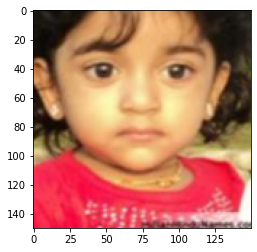

In [35]:
plt.imshow(np_features[2])

In [36]:
np_lables[2]

0

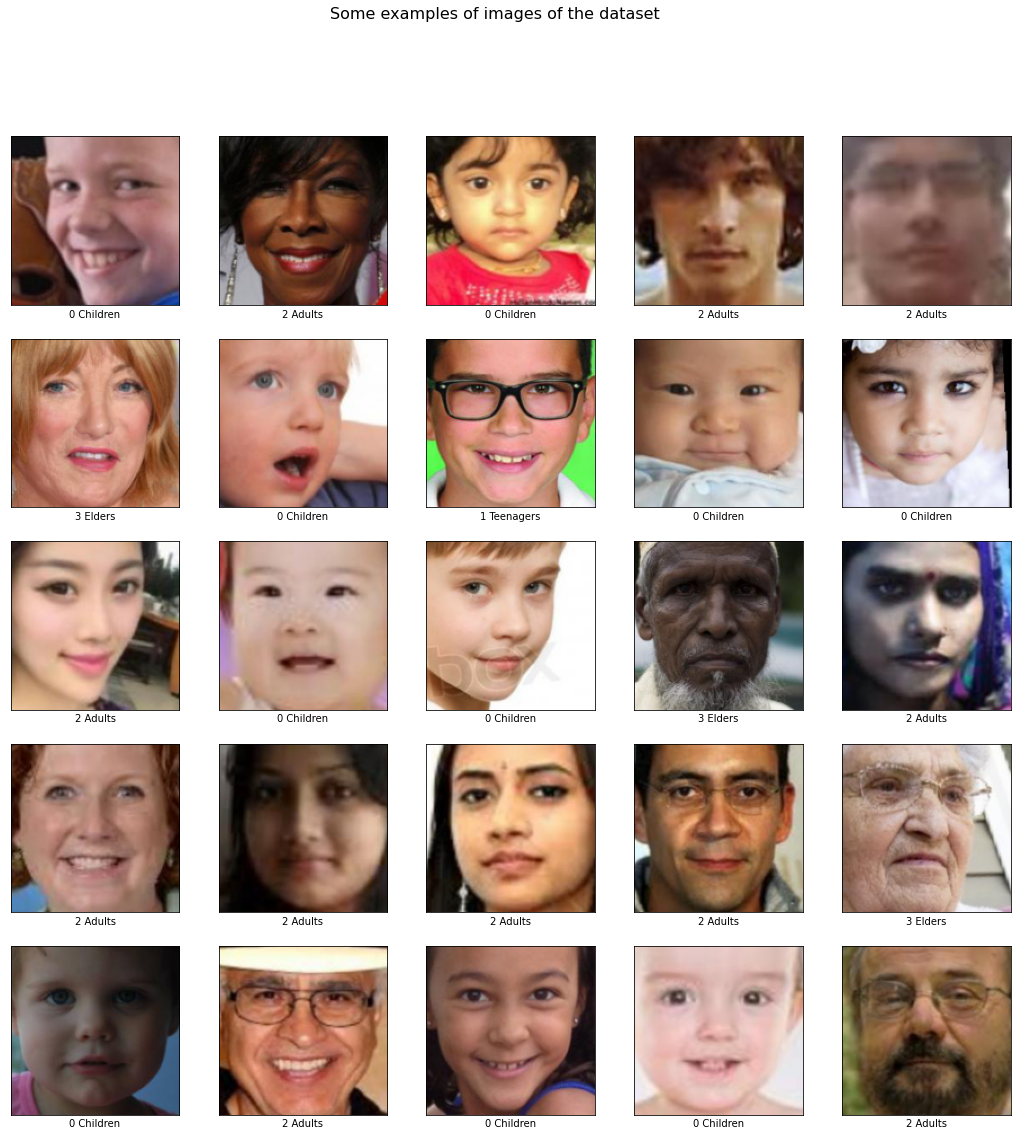

In [37]:
%matplotlib inline
fig = plt.figure(figsize=(18,18))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_features[i], cmap=plt.cm.binary)
    plt.xlabel(age_targets[np_lables[i]])
plt.show()

In [20]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

In [38]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

In [43]:
model.compile(optimizer=Optimizer.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 50)       

In [44]:
trained = model.fit(np_features,np_lables,epochs=3,validation_split=0.20) 

Epoch 1/3
247/247 [==============================] - 64s 258ms/step - loss: 0.9816 - accuracy: 0.6441 - val_loss: 0.9207 - val_accuracy: 0.6847
Epoch 2/3
247/247 [==============================] - 64s 258ms/step - loss: 0.7994 - accuracy: 0.6970 - val_loss: 0.6856 - val_accuracy: 0.7293
Epoch 3/3
247/247 [==============================] - 64s 258ms/step - loss: 0.7166 - accuracy: 0.7284 - val_loss: 0.7075 - val_accuracy: 0.7414


In [29]:
trained = model.fit(np_features,np_lables,epochs=5,validation_split=0.20) 

Epoch 1/5
247/247 [==============================] - 22s 65ms/step - loss: 1.4583 - accuracy: 0.3642 - val_loss: 1.2691 - val_accuracy: 0.4130
Epoch 2/5
247/247 [==============================] - 15s 62ms/step - loss: 1.2269 - accuracy: 0.5397 - val_loss: 1.0051 - val_accuracy: 0.6402
Epoch 3/5
247/247 [==============================] - 15s 63ms/step - loss: 1.0167 - accuracy: 0.6387 - val_loss: 0.8527 - val_accuracy: 0.6716
Epoch 4/5
247/247 [==============================] - 16s 63ms/step - loss: 0.9111 - accuracy: 0.6700 - val_loss: 0.8093 - val_accuracy: 0.6888
Epoch 5/5
247/247 [==============================] - 16s 63ms/step - loss: 0.8392 - accuracy: 0.6921 - val_loss: 0.7412 - val_accuracy: 0.7181
